In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [39]:
df=pd.read_csv('student_scores.csv')

In [40]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [41]:
df.shape

(25, 2)

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

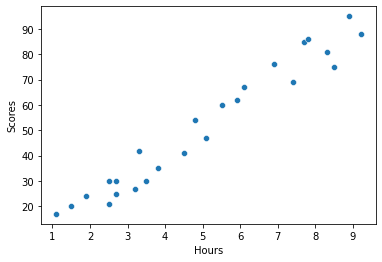

In [42]:
sns.scatterplot(data=df,x='Hours',y='Scores')

In [43]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:>

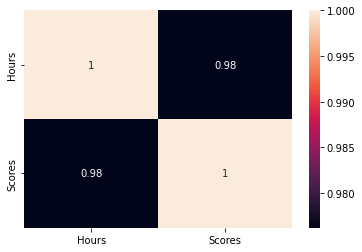

In [44]:
sns.heatmap(df.corr(),annot=True)

In [45]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [46]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
#wrong way to split the data because one var should be in df and other in series

In [47]:
X.shape

(25, 1)

In [48]:
X.dtypes

Hours    float64
dtype: object

In [49]:
y.shape

(25,)

In [50]:
y.dtypes

dtype('int64')

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#making a tuple and packing to grab training and testing set test size=%of dataset to be allocated to test size
#random=optional, ensures specific set of random spilts in data

In [53]:
X_train

,Hours
9,2.7
13,3.3
1,5.1
22,3.8
5,1.5
2,3.2
12,4.5
15,8.9
3,8.5
4,3.5


In [54]:
X_test

,Hours
8,8.3
16,2.5
0,2.5
23,6.9
11,5.9


In [55]:
y_train

9     25
13    42
1     47
22    35
5     20
2     27
12    41
15    95
3     75
4     30
20    30
17    24
21    54
18    67
24    86
7     60
10    85
14    17
19    69
6     88
Name: Scores, dtype: int64

In [56]:
y_test

8     81
16    30
0     21
23    76
11    62
Name: Scores, dtype: int64

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
lm=LinearRegression()

In [60]:
lm.fit(X_train,y_train)
#will make a best fit line

LinearRegression()

In [61]:
lm.intercept_

2.826892353899737

In [63]:
lm.coef_

array([9.68207815])

In [82]:
#example
pred=lm.predict([[9.2]])
pred

/Users/zeelmehta/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([91.90201137])

In [83]:
y_pred=lm.predict(X_test)
y_pred

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

In [84]:
dfpred=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
dfpred

,Actual,Predicted
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


In [85]:
from sklearn import metrics

In [86]:
#Mean Absolute Error
metrics.mean_absolute_error(y_test,y_pred)

3.9207511902099244

In [89]:
#MSE
metrics.mean_squared_error(y_test,y_pred)

18.943211722315272

In [87]:
#Root MSE
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

4.352380006653288